In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import tensorflow

In [2]:
import tensorflow as tf
print(tf.version)

<module 'tensorflow._api.v2.version' from '/opt/conda/lib/python3.7/site-packages/tensorflow/_api/v2/version/__init__.py'>


In [3]:
#import modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')


In [4]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
         break
print('Dataset is Loaded')
            

Dataset is Loaded


In [5]:
len(paths)

2800

In [6]:
paths[:5]

['/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_home_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_youth_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_near_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_search_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_pick_fear.wav']

In [7]:
labels[:5]

['fear', 'fear', 'fear', 'fear', 'fear']

In [8]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()


,speech,label
0,/kaggle/input/toronto-emotional-speech-set-tes...,fear
1,/kaggle/input/toronto-emotional-speech-set-tes...,fear
2,/kaggle/input/toronto-emotional-speech-set-tes...,fear
3,/kaggle/input/toronto-emotional-speech-set-tes...,fear
4,/kaggle/input/toronto-emotional-speech-set-tes...,fear


In [9]:
df['label'].value_counts()

fear       400
angry      400
disgust    400
neutral    400
sad        400
ps         400
happy      400
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

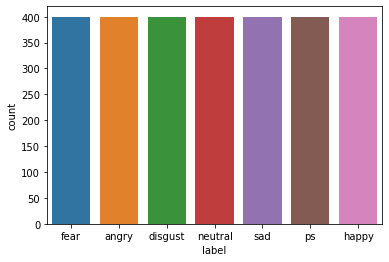

In [10]:
## exploratory data Analysis
sns.countplot(df['label'])

In [11]:
def waveplot(data,sr,emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data,sr=sr)
    plt.show()
    
def spectogram(data,sr,emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='hz')
    plt.colorbar()
    

    
    
    

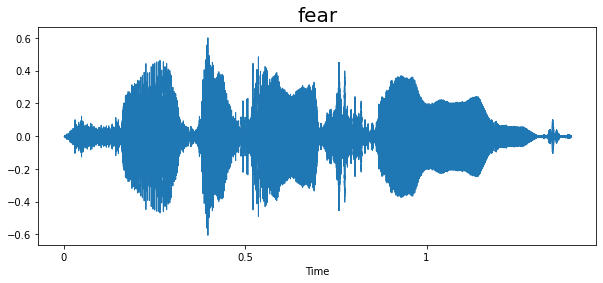

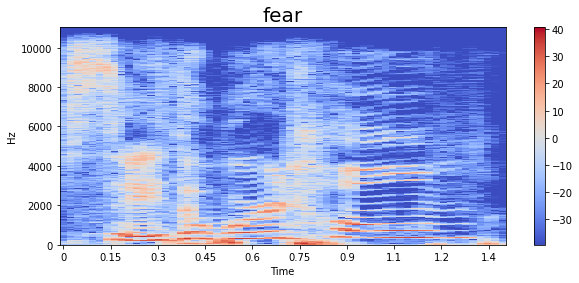

In [12]:
emotion = 'fear'
path = df['speech'][df['label']==emotion][0]
data,sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

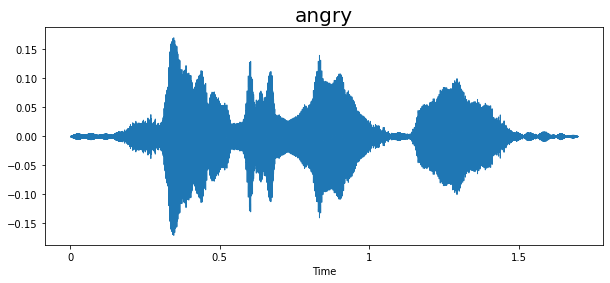

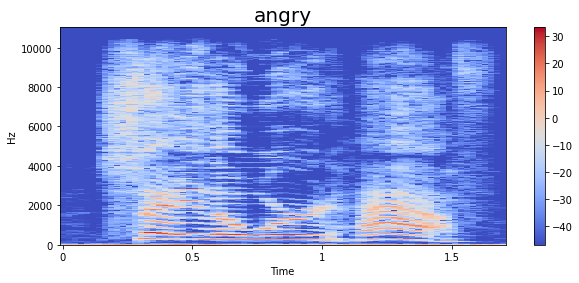

In [13]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data,sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

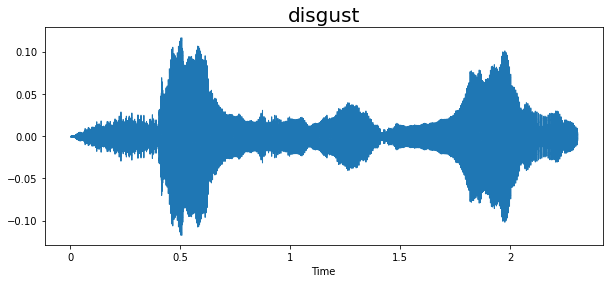

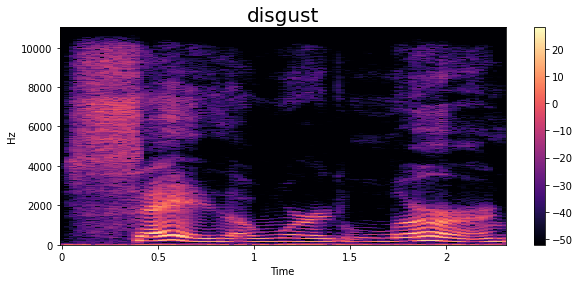

In [14]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[1]
data,sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

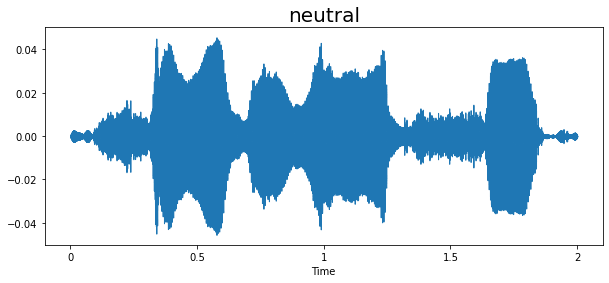

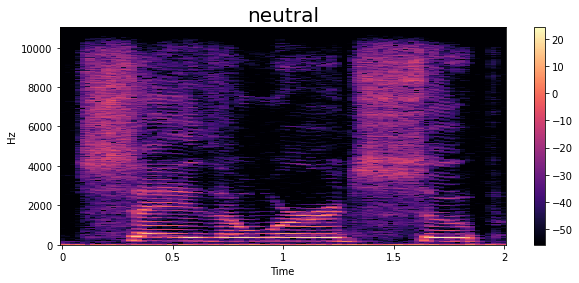

In [15]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

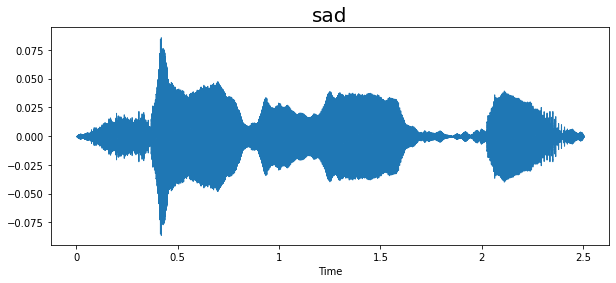

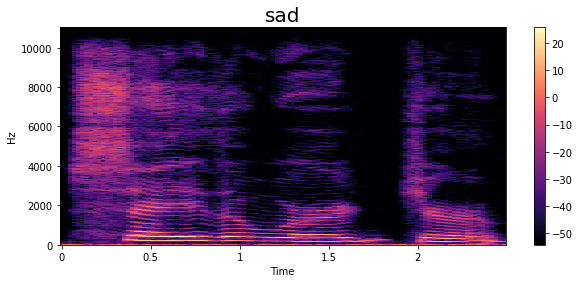

In [16]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

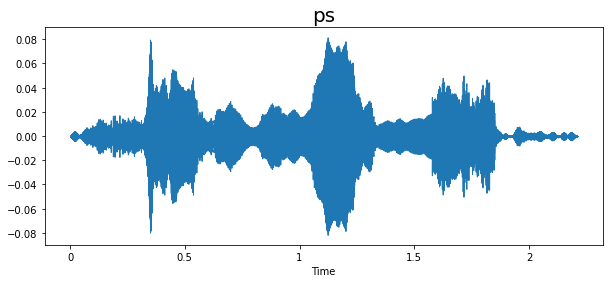

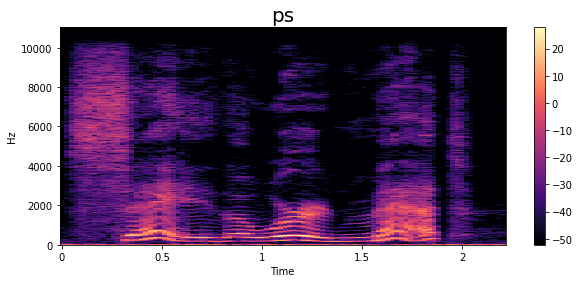

In [17]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

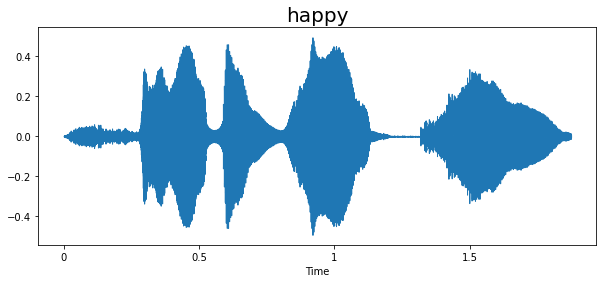

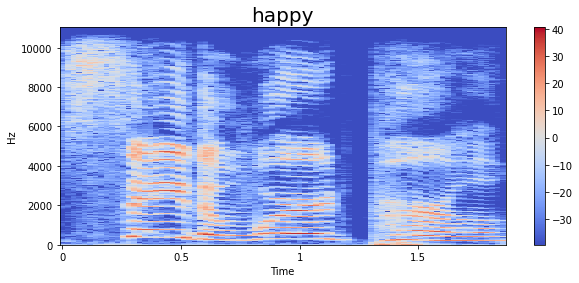

In [18]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[1]
data,sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

In [19]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [20]:
extract_mfcc(df['speech'][0])

array([-287.13037   ,   87.756935  ,   -4.139177  ,   24.081968  ,
        -16.696724  ,   12.970632  ,   10.522444  ,   -1.1463214 ,
         -0.73337686,   12.855532  ,  -19.147291  ,   -6.418063  ,
          4.9657683 ,   -2.6571155 ,  -10.655444  ,    4.9578815 ,
        -14.55586   ,   15.37587   ,   18.444935  ,   23.878317  ,
         31.495146  ,   17.326372  ,   -4.7648373 ,    1.7432437 ,
        -12.009847  ,    7.34574   ,   -3.2051265 ,   -7.171453  ,
        -11.410634  ,   -2.001994  ,   -5.610964  ,    4.5321946 ,
        -11.396625  ,   -8.892363  ,   -3.7391376 ,    4.8819685 ,
         -1.5599903 ,    2.465447  ,   11.59915   ,   11.042192  ],
      dtype=float32)

In [21]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [22]:
X_mfcc

0       [-287.13037, 87.756935, -4.139177, 24.081968, ...
1       [-350.0836, 37.654167, -6.2928553, 17.09615, 4...
2       [-341.78152, 56.153652, -16.617884, 23.219698,...
3       [-309.17456, 24.854897, -8.00109, 10.065497, -...
4       [-347.12918, 49.69155, -27.524876, 22.730288, ...
                              ...                        
2795    [-376.5839, 63.9598, -3.0598662, 11.498796, -2...
2796    [-316.5801, 43.54606, -9.336959, -0.198444, -5...
2797    [-359.7638, 81.01536, -18.355762, 5.3012295, -...
2798    [-354.38315, 103.432144, -15.916284, -10.30884...
2799    [-391.15958, 56.44471, -1.0464002, 0.9587419, ...
Name: speech, Length: 2800, dtype: object

In [23]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [24]:
## input split
X = np.expand_dims(X,-1)
X.shape

(2800, 40, 1)

In [25]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [26]:
y = y.toarray()


In [27]:
y.shape

(2800, 7)

In [28]:
## Create an LSTM model
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
model = Sequential([
     LSTM(256,return_sequences=False,input_shape=(40,1)),
     Dropout(0.2),
     Dense(128, activation='relu'),
     Dropout(0.2),
     Dense(64, activation='relu'),
     Dropout(0.2),
     Dense(7, activation='softmax')
])
    

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 256)               264192    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 4

In [29]:
# train the model
history = model.fit(X,y,validation_split=0.2,epochs=50,batch_size=512,shuffle=True)

Epoch 1/50
5/5 [==============================] - 4s 117ms/step - loss: 1.8442 - accuracy: 0.2808 - val_loss: 2.1393 - val_accuracy: 0.0000e+00
Epoch 2/50
5/5 [==============================] - 0s 18ms/step - loss: 1.5088 - accuracy: 0.4424 - val_loss: 2.0782 - val_accuracy: 0.0000e+00
Epoch 3/50
5/5 [==============================] - 0s 18ms/step - loss: 1.0879 - accuracy: 0.6103 - val_loss: 2.1552 - val_accuracy: 0.0179
Epoch 4/50
5/5 [==============================] - 0s 19ms/step - loss: 0.8003 - accuracy: 0.7129 - val_loss: 2.1513 - val_accuracy: 0.1339
Epoch 5/50
5/5 [==============================] - 0s 17ms/step - loss: 0.5818 - accuracy: 0.7848 - val_loss: 2.2408 - val_accuracy: 0.0839
Epoch 6/50
5/5 [==============================] - 0s 19ms/step - loss: 0.4579 - accuracy: 0.8406 - val_loss: 2.0450 - val_accuracy: 0.3018
Epoch 7/50
5/5 [==============================] - 0s 17ms/step - loss: 0.3505 - accuracy: 0.8844 - val_loss: 2.2026 - val_accuracy: 0.3304
Epoch 8/50
5/5 [==

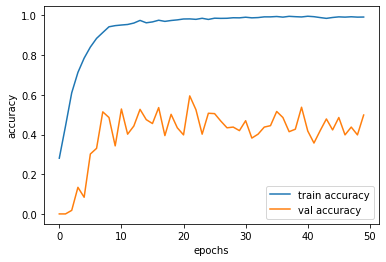

In [30]:
## plot the result
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

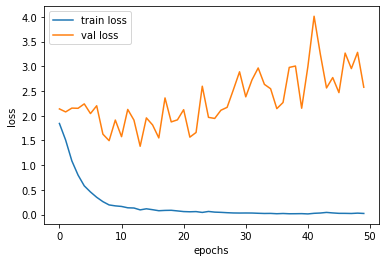

In [31]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()